Case Study in IT-IM05

Netflix Exploratory Data Analysis (EDA) Using Python

Prepared By
    Cortez, Tricia Mae Diane M.,
    Ellerma, Carlos Mari B.,
    San Luis, John Rendel,
    Yamagishi, Ken D.

Collect Data (Data Collection)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn

# Read the data from the csv file
df = pd.read_csv('data/netflix_titles.csv')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Data Preparation (Prep Data)

In [3]:
df.shape #tell us the number of rows and columns

(8807, 12)

In [5]:
df.columns #tell us the names of the columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info() #tell us the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe() #tell us the statistical summary of the data

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.isna().sum() #tell us the number of missing values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['country'].replace(np.nan, 'USA',inplace  = True)
df['director'].replace(np.nan, 'No Director',inplace = True)  
df['cast'].replace(np.nan, 'No Cast',inplace = True)  
df['country'].replace(np.nan, 'Not Specify',inplace = True) 

In [9]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",USA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,USA,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df = df.dropna()  #remove missing values

In [27]:
df['rating'].value_counts()  

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [3]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [17]:
#lists of movies depending on what rating
df[(df['type']=='Movie') & (df['rating'] == 'TV-14')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",USA,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",USA,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8774,s8775,Movie,يوم الدين,Abu Bakr Shawky,"Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...","Egypt, Austria, United States","October 22, 2019",2018,TV-14,97 min,"Dramas, Independent Movies, International Movies",A man cured of leprosy and a young orphan leav...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...


In [18]:
#lists of movies depending on what rating and specific country
df[(df['type']=='Movie') & (df['rating'] == 'TV-14') & (df['country']== 'USA')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",USA,"September 22, 2021",2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",USA,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,USA,"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",USA,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
79,s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",USA,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
...,...,...,...,...,...,...,...,...,...,...,...,...
8328,s8329,Movie,The Gospel of Mark,David Batty,"Selva Rasalingam, Mourad Zaoui, El Mahmoudi M'...",USA,"October 19, 2018",2015,TV-14,123 min,"Dramas, Faith & Spirituality",See Jesus from a disciple's point of view in t...
8329,s8330,Movie,The Gospel of Matthew,David Batty,"Selva Rasalingam, Mourad Zaoui, Karima Gouit, ...",USA,"October 19, 2018",2014,TV-14,190 min,"Dramas, Faith & Spirituality",The Apostle Matthew is highlighted in this wor...
8450,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,No Cast,USA,"September 1, 2018",2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo...","French soccer fans, celebrities and athletes r..."
8481,s8482,Movie,The Republic of Imbaba,Ahmed Al-Badry,"Bassem Samra, Ola Ghanem, Ahmad Wafiq, Feryal ...",USA,"June 6, 2019",2015,TV-14,90 min,"Dramas, International Movies",Living on the edges of Cairo’s Embabah neighbo...


In [20]:
#list of tv shows depending on the rating and released year
df[(df['type'] == 'TV Show') & (df['rating'] == 'TV-14') & (df['release_year'] > 2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,No Cast,USA,"September 22, 2021",2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
25,s26,TV Show,Love on the Spectrum,No Director,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
82,s83,TV Show,Lucifer,No Director,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,"September 10, 2021",2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
102,s103,TV Show,Countdown: Inspiration4 Mission to Space,Jason Hehir,No Cast,USA,"September 6, 2021",2021,TV-14,1 Season,"Docuseries, Science & Nature TV","From training to launch to landing, this all-a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4057,s4058,TV Show,Northern Rescue,No Director,"William Baldwin, Kathleen Robertson, Spencer M...",Canada,"March 1, 2019",2019,TV-14,1 Season,TV Dramas,"After the sudden death of his wife, search and..."
4132,s4133,TV Show,Romance is a bonus book,No Director,"Lee Jong-suk, Lee Na-young, Jung Eugene, Wi Ha...",South Korea,"February 3, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A gifted writer who's the youngest editor-in-c...
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,No Director,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,"May 30, 2018",2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...


<Axes: xlabel='type', ylabel='count'>

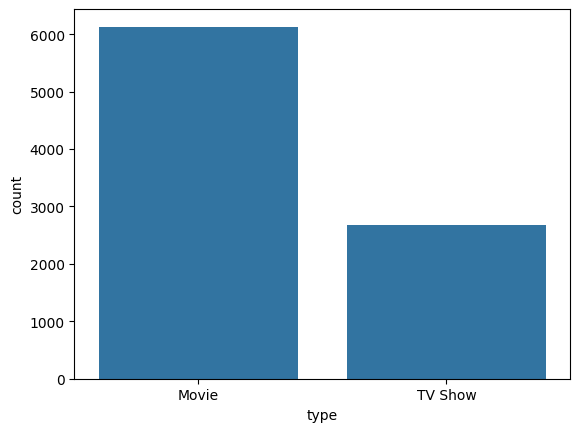

In [21]:
sbn.countplot(x='type', data=df)

<Axes: xlabel='rating', ylabel='count'>

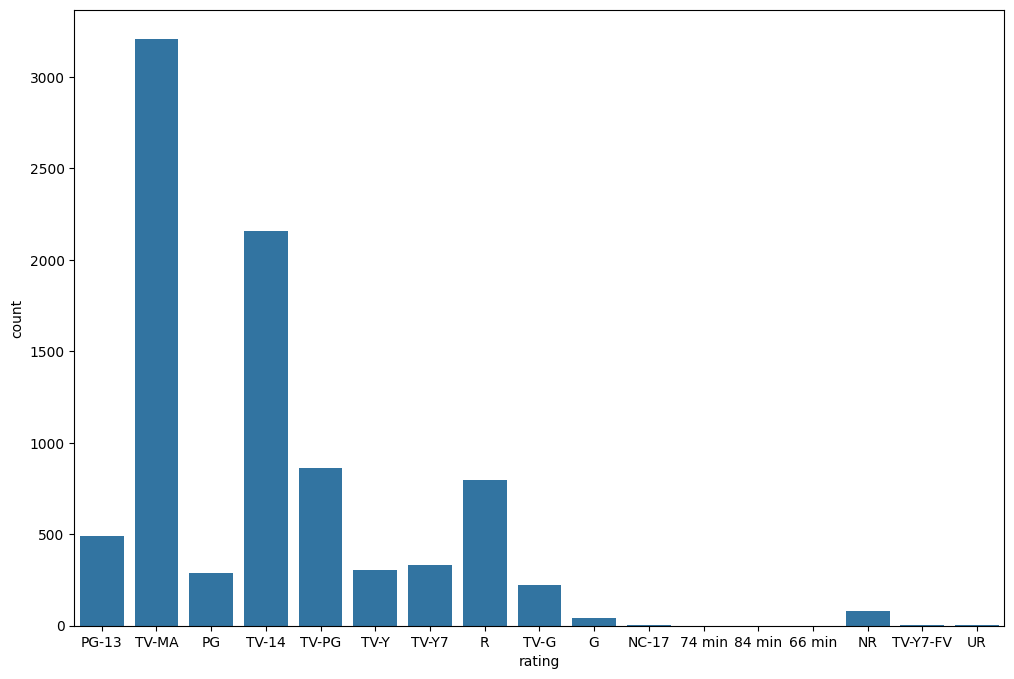

In [25]:
plt.figure(figsize = (12, 8))  
sbn.countplot(x = 'rating',data = df)  

<Axes: xlabel='rating', ylabel='count'>

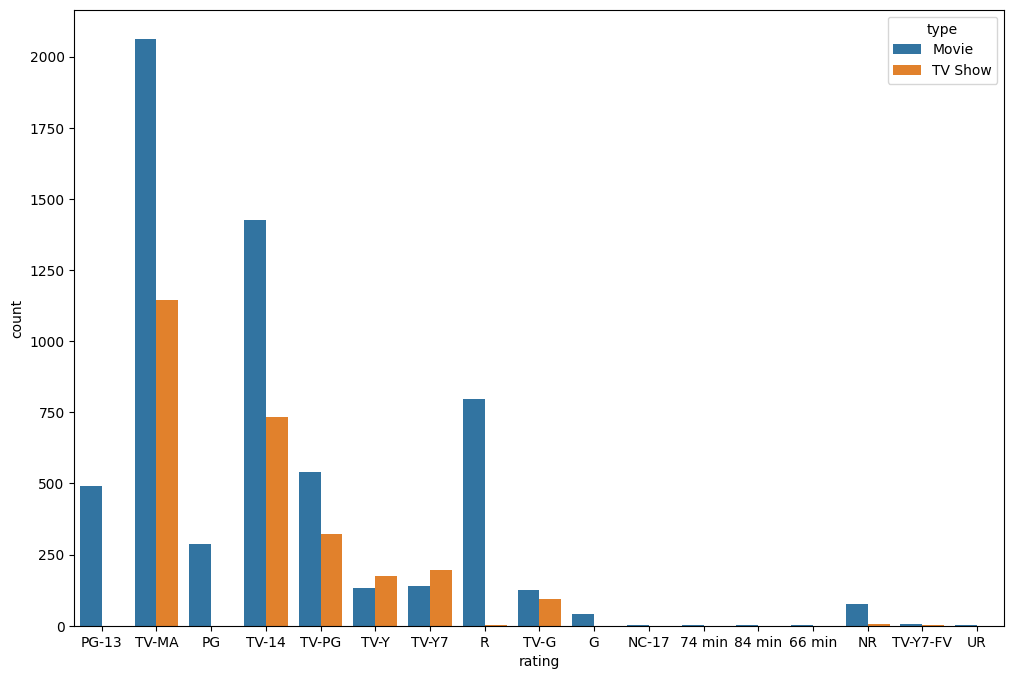

In [29]:
plt.figure(figsize = (12,8))  
sbn.countplot(x = 'rating',data = df,hue = 'type')  

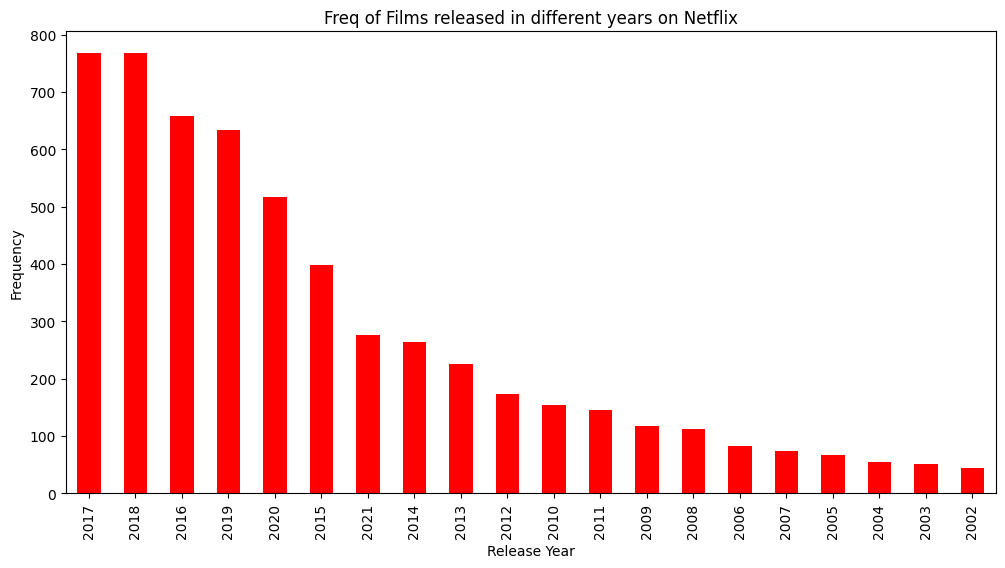

In [41]:
plt.figure(figsize=(12, 6))

df[df["type"] == "Movie"]["release_year"].value_counts()[:20].plot(kind="bar", color="red")

plt.title("Freq of Films released in different years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.show()

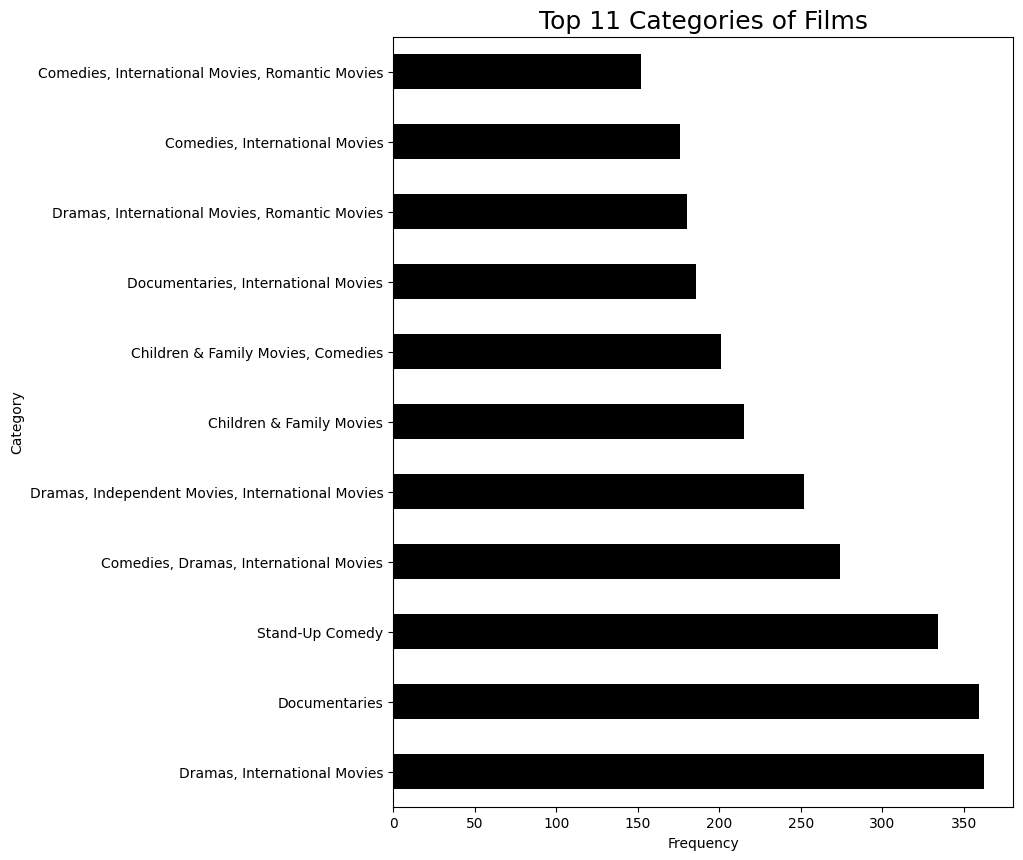

In [47]:
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed

# Assuming 'type' and 'listed_in' are column names in your DataFrame 'df'
df[df["type"] == "Movie"]["listed_in"].value_counts()[:11].plot(kind="barh", color="black")

plt.title("Top 11 Categories of Films", size=18)
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

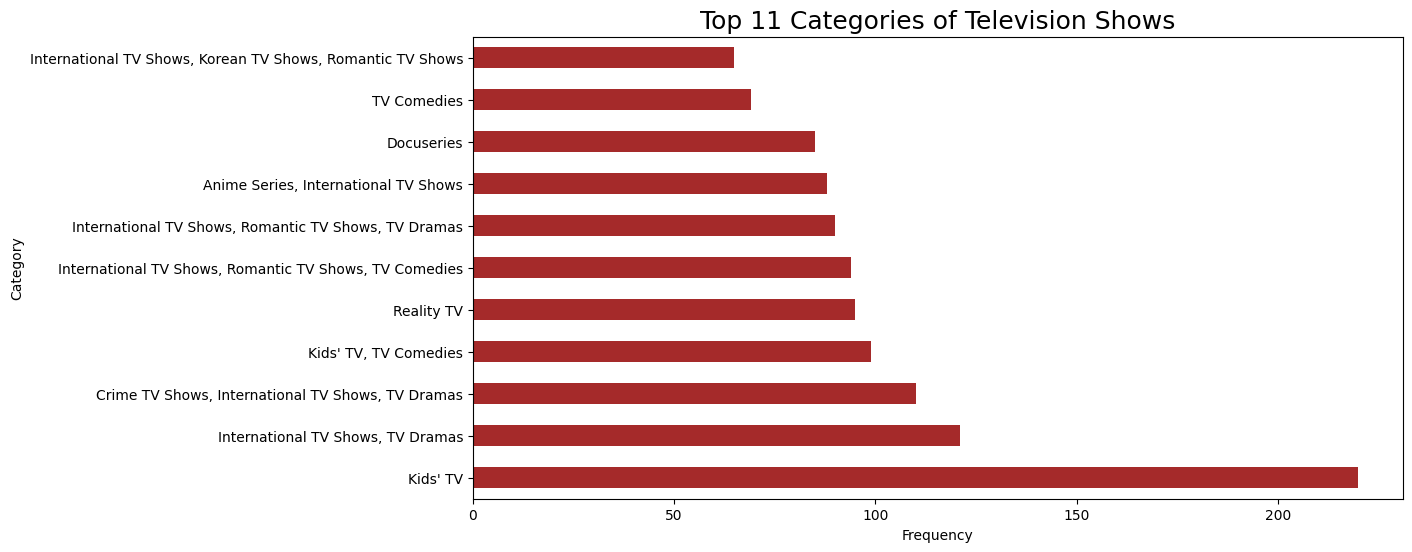

In [63]:
plt.figure(figsize=(12, 6))

# Assuming 'type' and 'listed_in' are column names in your DataFrame 'df'
df[df["type"] == "TV Show"]["listed_in"].value_counts()[:11].plot(kind="barh", color="brown")

plt.title("Top 11 Categories of Television Shows", size=18)
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()